**Categorize Musics with PCA and K-Means Clustering**
The spotify feature dataset certainly helps us to get desirable songs according to ones choices. Clustering and dimension reduction would help us to identify speicifc song list to suggest clients based on the festures. 

In [20]:
!pip install pyclustertend
!pip install numba==0.53
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.53.0-cp38-cp38-manylinux2014_x86_64.whl (3.4 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.53.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from pyclustertend import hopkins
sns.set()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here I have used Spotify features dataset and took random 80% rows to lower the run time for practicality. Also we can see the features and size of our dataset.

In [23]:
input_df = pd.read_csv('/content/drive/MyDrive/SpotifyFeatures.csv')
# input_df = pd.read_csv('/content/drive/MyDrive/tracks.csv')
print(input_df.shape)
print(input_df.columns)
# sample 80% rows randomly
sample_input_df = input_df.sample(frac = 0.8)
print(sample_input_df.shape)

(232725, 18)
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')
(186180, 18)


Cleaning the data to get correct result.

In [24]:
print(pd.isnull(sample_input_df).sum().sum())
sample_input_df = sample_input_df.dropna()
print(pd.isnull(sample_input_df).sum().sum())

0
0


To create the unique index for each song, "track name" and "track id" has been joined. We also need to pick useful feature by which we can differentiate one from another. In purpose of that we are dropping several columns.

In [25]:
print(sample_input_df.columns.tolist())
print(sample_input_df.dtypes)

# sample_input_df = sample_input_df.rename(columns={'name': 'title'})
# sample_input_df['id'] = sample_input_df[['title', 'id']].agg('-'.join, axis=1)
# sample_input_df = sample_input_df.set_index('id')

# sample_input_df['release_year'] = sample_input_df['release_date'].apply(lambda x : x.split('-')[0])

# columns_to_drop = ['id_artists', 'artists', 'title', 'release_date', 'release_year', 'explicit', 'popularity', 'key', 'time_signature']
# sample_input_df = sample_input_df.drop(columns=columns_to_drop, axis=1, errors='ignore')


sample_input_df['track_id'] = sample_input_df[['track_name', 'track_id']].agg('-'.join, axis=1)
sample_input_df = sample_input_df.set_index('track_id')

columns_to_drop = ['artist_name', 'track_name', 'popularity', 'key', 'time_signature', 'duration_ms', 'genre', 'mode']
sample_input_df = sample_input_df.drop(columns=columns_to_drop, axis=1, errors='ignore')

sample_input_df.head()

['genre', 'artist_name', 'track_name', 'track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,
Gin and Juice-7v7ytRZIWuZuNxXSGwxIhK,0.32700,0.547,0.724,0.000001,0.1080,-6.818,0.0441,120.357,0.806
Blue-0kSlgmT1QusTvnAZJetz0l,0.28700,0.381,0.578,0.000001,0.0912,-8.242,0.2290,92.009,0.443
Creeping In-1m2FqENbFOc35UpqK7P1Zs,0.00277,0.757,0.525,0.000003,0.0661,-6.996,0.1010,79.429,0.343
Real Love-5XwOhiy665ZXdXaVD59LWt,0.90700,0.544,0.442,0.013700,0.2710,-7.489,0.0318,91.757,0.342
The Prince-5H8FtBnOtkSeLfzz0mk4g5,0.00386,0.632,0.852,0.001950,0.0707,-6.134,0.0424,98.346,0.862


Standardizing data before clustering is important because clustering algorithms are sensitive to the scale of the variables being used. If the variables have different scales, the clustering algorithm may give more weight to variables with larger scales, which can skew the results.

Here several scaling has been tried and out of those, standard scaler has given more accurate clustarable dataset. 

From correlation table we can see the correlation between features but its very tedious to find out correlation between each features and find out those songs. 

for further details of data we projected histogram of some features to get better idea.



In [26]:
original_columns = sample_input_df.columns.tolist()
# scaler = RobustScaler()
# scaled_df = scaler.fit_transform(sample_input_df)
  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(sample_input_df)
  
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(sample_input_df)

scaled_df = pd.DataFrame(scaled_df, columns=original_columns)
# scaled_df = sample_input_df

print(scaled_df.describe())
print(scaled_df.var())
print(scaled_df.corr())

       acousticness  danceability        energy  instrumentalness  \
count  1.861800e+05  1.861800e+05  1.861800e+05      1.861800e+05   
mean  -1.688007e-16 -2.940558e-16  4.562922e-16      5.785706e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00      1.000003e+00   
min   -1.039678e+00 -2.680292e+00 -2.168744e+00     -4.894464e-01   
25%   -9.336615e-01 -6.430112e-01 -7.024386e-01     -4.894464e-01   
50%   -3.855309e-01  8.978502e-02  1.295247e-01     -4.893023e-01   
75%    9.960739e-01  7.363699e-01  8.209281e-01     -3.718103e-01   
max    1.768645e+00  2.342056e+00  1.626299e+00      2.811633e+00   

           liveness      loudness   speechiness         tempo       valence  
count  1.861800e+05  1.861800e+05  1.861800e+05  1.861800e+05  1.861800e+05  
mean  -1.676939e-16 -3.258467e-16  9.151797e-17  6.842094e-16 -7.277930e-17  
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  
min   -1.035109e+00 -7.152328e+00 -5.315057e-01 -2.822541e+00 -1.7

From the plots, we can see people prefer low acousticness, high loudness, energy etc.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

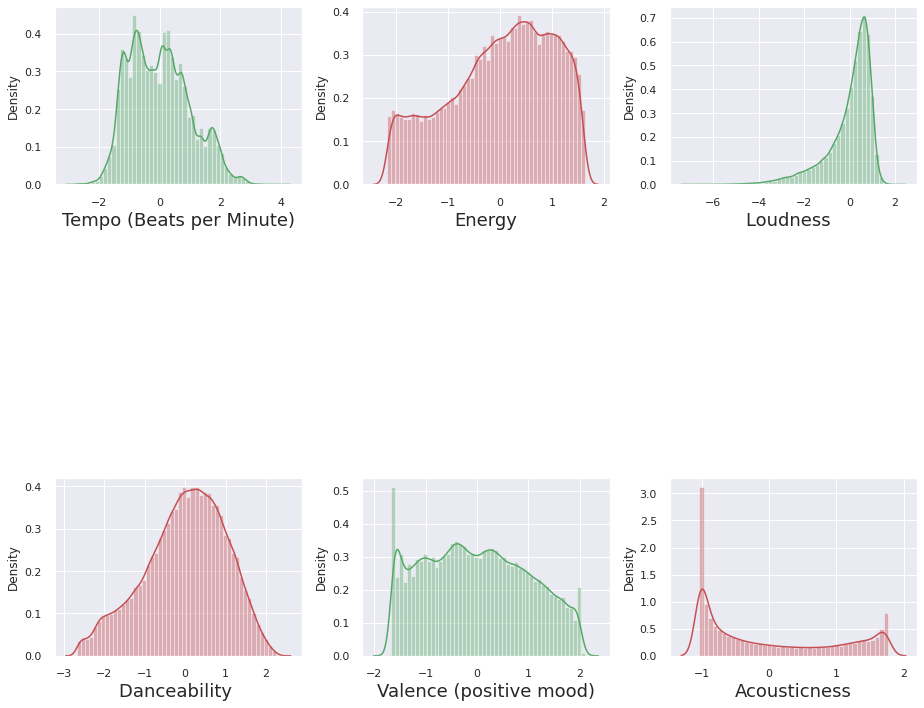

In [27]:
plt.figure(1, figsize=(13, 10),)

hfont = {'fontname':'Dejavu Sans'}

plt.subplot(331)
sns.distplot(scaled_df["tempo"],color = "g");
# plt.text(0, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (Beats per Minute)', fontsize=18, **hfont)
plt.grid(True)


plt.subplot(332)
sns.distplot(scaled_df["energy"],color = "r");
# plt.text(-1.5, .020, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(scaled_df["loudness"],color = "g");
# plt.text(-2, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(scaled_df["danceability"],color = "r");
# plt.text(-1, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(scaled_df["valence"],color = "g");
# plt.text(-0.5, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(scaled_df["acousticness"],color = "r");
# plt.text(0.0, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout()
plt.show()

# ***Dimension Reduction***
Principal Component Analysis (PCA) is useful as it can help to identify the most important features or variables that contribute the most to the overall variability in the data. By reducing the number of features, it becomes easier to visualize and interpret the data and identify patterns and relationships between songs.

Our standarized data has been used for pcs which will return the variance of 9 features.

In [28]:
pca = PCA()
pca.fit(scaled_df)
evr = pca.explained_variance_ratio_
print(evr)

[0.38270285 0.18001699 0.12082891 0.09334247 0.07719199 0.0581261
 0.04408415 0.03086018 0.01284635]


If we plot our cumulative sum of variance for features we can see that if we select 5 components it gives us enough variance for the whole dataste. 

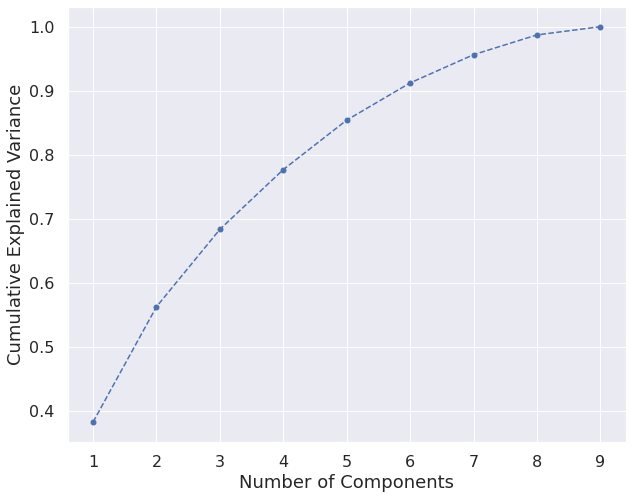

In [29]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(sample_input_df.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.savefig("/content/drive/MyDrive/cumulative_variance_plot.png")
plt.show()

Our desire component number is 5 if we consider 80% variance of features data.

In [30]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        comps = i + 1
        break
print("Number of components:", comps)
pca = PCA(n_components=comps)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

Number of components: 5


For better visualization, dataset is plotted in 3D by using 3 components only even thought our opmial number of components shoulld be 5. 

[[ 0.4229625  -0.33988998 -0.46528457  0.33334573 -0.05576214 -0.47662728
  -0.0534891  -0.16211339 -0.3443016 ]
 [ 0.2249899   0.03345064  0.04895631 -0.17374116  0.64225811 -0.06246753
   0.67590043 -0.20531439 -0.01687701]
 [-0.19943613 -0.57231138  0.26648716  0.11076378  0.2753111   0.14204699
   0.00428036  0.52479366 -0.42190123]]
[0.38270285 0.18001699 0.12082891]


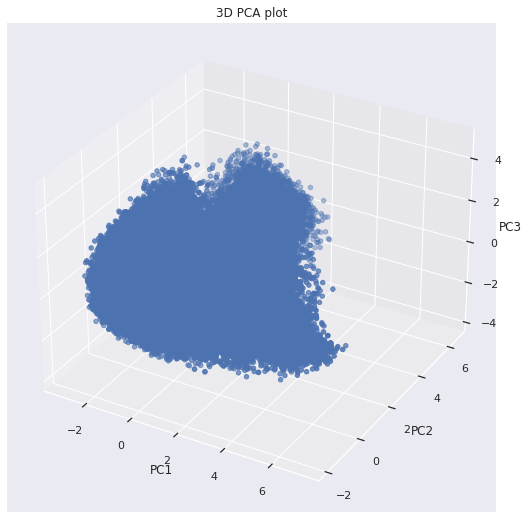

In [31]:
#perform PCA
#n Components = n Dimensions
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_df) 
Viz_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3'])

print(pca.components_)
print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(Viz_df['pc_1'], 
        Viz_df['pc_2'], 
        Viz_df['pc_3'])
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)

plt.title("3D PCA plot")
plt.show()

# **Clustering**
The inertia_ function in Python is an attribute of the KMeans clustering algorithm. This function returns a single value that represents the sum of squared distances for all clusters. The lower the value of inertia_, the better the clustering algorithm has performed, indicating that the data points are tightly clustered around their respective centroids. 

In following code we are determining how many clusters would be optimal to get minimum within-cluster sum of squares (WCSS).


In [32]:
from kneed import KneeLocator
import plotly.graph_objects as go
wcss = []
Mclusters = 11
for i in range(1, Mclusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=2022)
    kmeans_pca.fit(pca_df)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, Mclusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

Optimal number of clusters 3


Our optimal number of cluster is 3.

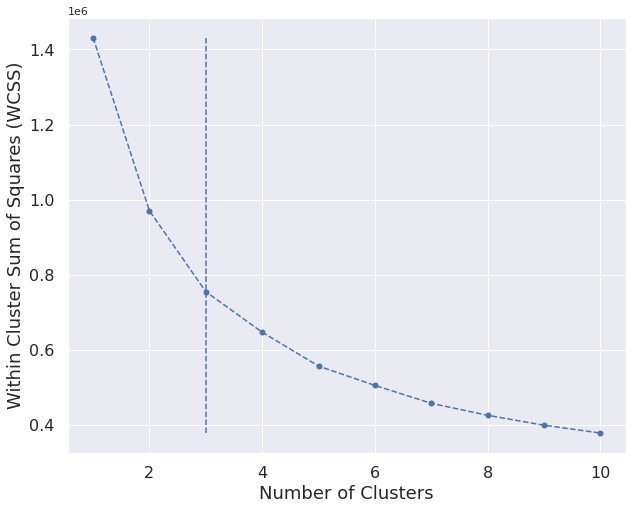

In [33]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, Mclusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/num_clusters.png")
plt.show()

The Hopkins statistic is used to measure the cluster tendency of a dataset, which is the degree to which a dataset can be considered as having clusters that are distinct from each other. For clusterable datasets Hopkins statistic is close to 0, if computed using pyclustertend.hopkins() function from pyclustertend package. 

In order to get conventional hopkins score, hopkins score has veen calculated by substracting from 1. Thus, more scor towards to 1 means better clusterability.

In [34]:
hopkins_sum = 0

for i in range(5):
    """pyclustertend.hopkins() -> Assess the clusterability of a dataset. A score between 0 and 1, 
    a score tending to 0 express a high cluster tendency."""
    hopkins_sum = hopkins_sum + hopkins(pca_df, pca_df.shape[0])

hopkins_score = 1 - hopkins_sum/5

print(hopkins_score) # more means better clusterability

0.938474940676043


The silhouette score showing us 3 clusters giving us highest score

In [ ]:
# Elbow Method for K means with Silhouette Score
# k is range of number of clusters.
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
visualizer = KElbowVisualizer(KMeans(random_state=2022), k=(2,11), metric='silhouette', timings=False)
visualizer.fit(pca_df) # Fit data to visualizer
visualizer.show() 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The InterclusterDistance visualizer helps to interpret the clustered data situation by showing the distances between the centroids of different clusters.By analyzing the distances between the centroids, we can determine whether the clusters are well-separated or overlapping. If the distances between the centroids are large, it suggests that the clusters are well-separated and distinct from each other. On the other hand, if the distances between the centroids are small, it suggests that the clusters may be overlapping or poorly separated. Here we can see the 3 centroid are well seperated frorm each other.

In [ ]:
model = KMeans(3,random_state=2022)
visualizer = InterclusterDistance(model, random_state=2022)
Viz_pca_df = pd.DataFrame(pca_df) # Convert the NumPy array to a pandas DataFrame
visualizer.fit(Viz_pca_df.iloc[:,:3])        # Fit the data to the visualizer
visualizer.show()  

Even though ELbow method showing us to select 5 cluster but we are going with 3 clusters as its giving better silhoutte score!

In [ ]:
# Elbow Method for K means
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(random_state=2022), k=(2,10), timings=False)
visualizer.fit(pca_df) # Fit data to visualizer
visualizer.show() 

# **Labeling**
Now we already have our optimal number of compononets and clusters. We just have to label each of our songs according to their cluster where they belong.

In [ ]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=2022)
kmeans_pca.fit(pca_df);

In [ ]:
Cluster_pca_kmeans = pd.concat([sample_input_df.reset_index(drop=True), pd.DataFrame(pca_df)], axis=1)
Cluster_pca_kmeans.columns.values[(-1*comps):] = ["Component " + str(i+1) for i in range(comps)]
Cluster_pca_kmeans['Cluster'] = kmeans_pca.labels_
Cluster_pca_kmeans.head()

To visualize our data in their respective clusters, we plotted them in 2D plot. From the plots we can see clusters are pretty well separated from each other. But, we have to remmember that this is 2D plot of 5 dimensional pcs dataset. So, we cant definitively state any statement about features of a specific cluster.

In [ ]:
x = Cluster_pca_kmeans['Component 2']
y = Cluster_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=Cluster_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("/content/drive/MyDrive/clusters-2d.png")

# **Analyzing Clusters**
To get further details of each of our clusters, we can measure features for each cluster. In order to get the real value of features now we have to take the clean dataframe in account as the "Cluster_pca_kmeans" dataset is standarized. Also we have to add "cluster" column from "Cluster_pca_kmeans" dataset. As their index isn't same so we have to set it to the same index first and then copied the column from "Cluster_pca_kmeans" dataset and paste it to sample_input_df dataset.

In [ ]:
Cluster_pca_kmeans.index = sample_input_df.index
sample_input_df['Cluster'] = Cluster_pca_kmeans['Cluster']
sample_input_df

From the barcharts, we can observe some features for each cluster. For an example, cluster 0 has high acousticness, low intrumentalness.

In [ ]:
sample_input_df['Cluster'] = Cluster_pca_kmeans['Cluster']
clusters = [0, 1, 2]
features = ["acousticness", "speechiness", "instrumentalness"]
colors = ['tab:blue', 'tab:orange', 'tab:green']
dim = len(clusters)
dimf = len(features)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = sample_input_df.loc[sample_input_df['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = sample_input_df.loc[sample_input_df['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(sample_input_df[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1
    
fig.savefig("/content/drive/MyDrive/cluster_feature_bar_charts_dim_3.png")

# **Concluion**
Through this project we can see how clustered can save us a lot of time for selecting a song of our choice. now based on our choice of features we can select a song fast! 